# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from itertools import product

# load dataset 5

In [2]:
df = pd.read_csv('5_interest_rate.csv', low_memory=False)

In [3]:
# Print the value counts for the filtered DataFrame
print("Value counts for applicant_race_1 after filtering:")
print(df['applicant_race_1'].value_counts())
print(df['co_applicant_race_1'].value_counts())

print("Value counts for applicant_ethnicity_1 after filtering:")
print(df['applicant_ethnicity_1'].value_counts())
print(df['co_applicant_ethnicity_1'].value_counts())

Value counts for applicant_race_1 after filtering:
5.0    59522
3.0     3410
Name: applicant_race_1, dtype: int64
5.0    59503
3.0     3429
Name: co_applicant_race_1, dtype: int64
Value counts for applicant_ethnicity_1 after filtering:
2.0    56532
1.0     6400
Name: applicant_ethnicity_1, dtype: int64
2.0    56346
1.0     6586
Name: co_applicant_ethnicity_1, dtype: int64


In [4]:
print(df['interest_rate'].value_counts())

3.5-4.0     40625
4.0-4.5      8243
3.0-3.5      7101
4.5-5.0      3380
2.0-3.0      1872
5.0-6.0      1488
6.0-7.0       184
7.0-8.0        15
8.0-9.0        13
9.9-15.0        5
0.0-1.0         3
1.0-2.0         3
Name: interest_rate, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62932 entries, 0 to 62931
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   action_taken                              62932 non-null  int64  
 1   loan_type                                 62932 non-null  int64  
 2   lien_status                               62932 non-null  int64  
 3   open_end_line_of_credit                   62932 non-null  int64  
 4   loan_amount                               62932 non-null  int64  
 5   combined_loan_to_value_ratio              61760 non-null  object 
 6   interest_rate                             62932 non-null  object 
 7   total_loan_costs                          36829 non-null  object 
 8   origination_charges                       36829 non-null  object 
 9   loan_term                                 62884 non-null  object 
 10  negative_amortization             

In [6]:
df.head()

,action_taken,loan_type,lien_status,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,loan_term,...,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_sex,co_applicant_sex,applicant_age,co_applicant_age
0,3,3,1,2,205000,110.256,3.5-4.0,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,7,4
1,3,2,1,2,155000,59.485,3.5-4.0,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,2,1,3,3
2,3,2,1,2,125000,61.367,3.5-4.0,NaN,NaN,360,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,4,3
3,3,2,1,2,55000,57.997,3.5-4.0,NaN,NaN,360,...,2.0,2.0,3.0,NaN,3.0,NaN,1,2,2,2
4,3,1,1,2,345000,78.841,3.5-4.0,NaN,NaN,180,...,2.0,2.0,5.0,NaN,5.0,NaN,1,2,2,2


In [7]:
print(df['combined_loan_to_value_ratio'].value_counts())

80.0       9270
95.0       2479
75.0       1848
97.0       1805
90.0       1550
           ... 
92.762        1
104.757       1
4.0           1
98.54         1
31.24         1
Name: combined_loan_to_value_ratio, Length: 20180, dtype: int64


In [8]:
unique_categories = df['combined_loan_to_value_ratio'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 20180


In [9]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df['combined_loan_to_value_ratio'].max()
median_interest_rate = df['combined_loan_to_value_ratio'].median()

print("Minimum combined_loan_to_value_ratio:", minimum_interest_rate)
print("Maximum combined_loan_to_value_ratio:", maximum_interest_rate)
print("Median combined_loan_to_value_ratio:", median_interest_rate)

Minimum combined_loan_to_value_ratio: 0.03
Maximum combined_loan_to_value_ratio: 29742.857
Median combined_loan_to_value_ratio: 77.705


In [10]:
# Convert the 'combined_loan_to_value_ratio' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['combined_loan_to_value_ratio'] < lower_bound) | (df['combined_loan_to_value_ratio'] > upper_bound)]

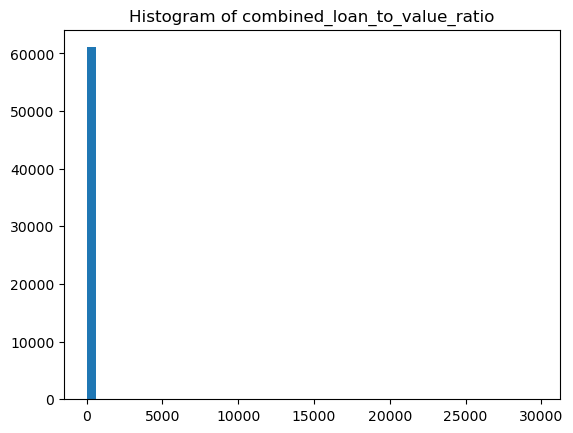

In [11]:
plt.hist(df['combined_loan_to_value_ratio'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of combined_loan_to_value_ratio')
plt.show()

[110.256  59.485  61.367 ...  72.616  76.792  31.24 ]
1869


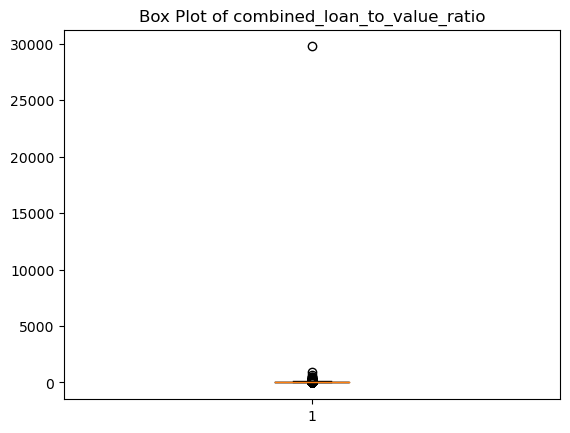

In [12]:
df1 = df.copy()
df1['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')
df1 = df1.dropna(subset=['combined_loan_to_value_ratio'])

print(df['combined_loan_to_value_ratio'].unique())
print(df['combined_loan_to_value_ratio'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['combined_loan_to_value_ratio'])
plt.title('Box Plot of combined_loan_to_value_ratio')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

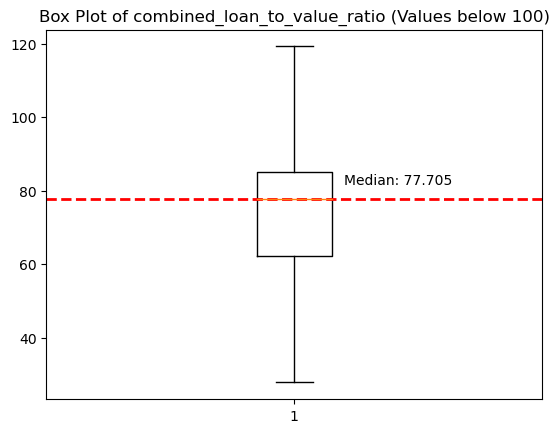

In [13]:
# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['combined_loan_to_value_ratio'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of combined_loan_to_value_ratio (Values below 100)')

# Calculate the median value
median_value = df1['combined_loan_to_value_ratio'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.1, median_value + 5, f'Median: {median_value}', va='center')

plt.show()

# Conclusion

##### A median combined loan-to-value (CLTV) ratio of 75 suggests that, in the dataset, the typical loan is issued with the borrower having equity in the property of approximately 75%. 
In the context of mortgages and lending, a CLTV ratio below 100% indicates that the borrower has some level of equity in the property.

In general, a lower CLTV ratio is often seen as less risky for lenders because it means the borrower has a larger stake in the property. 
A higher CLTV ratio, on the other hand, may indicate higher risk for the lender.

# Remove outliers

In [14]:
# Calculate the IQR for combined_loan_to_value_ratio
Q1 = df1['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df1['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['combined_loan_to_value_ratio'] < lower_bound) | (df1['combined_loan_to_value_ratio'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 1883


In [15]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

# Display the values of the removed outliers
print(outliers_df['combined_loan_to_value_ratio'])

19       293.545
31         5.217
57         4.542
71       268.107
81        19.200
          ...   
62500     24.730
62608     24.091
62792     17.937
62857     25.433
62876     12.225
Name: combined_loan_to_value_ratio, Length: 1883, dtype: float64


In [16]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

80.000     9270
95.000     2479
75.000     1848
97.000     1805
90.000     1550
           ... 
99.578        1
104.355       1
83.732        1
54.520        1
31.240        1
Name: combined_loan_to_value_ratio, Length: 18817, dtype: int64


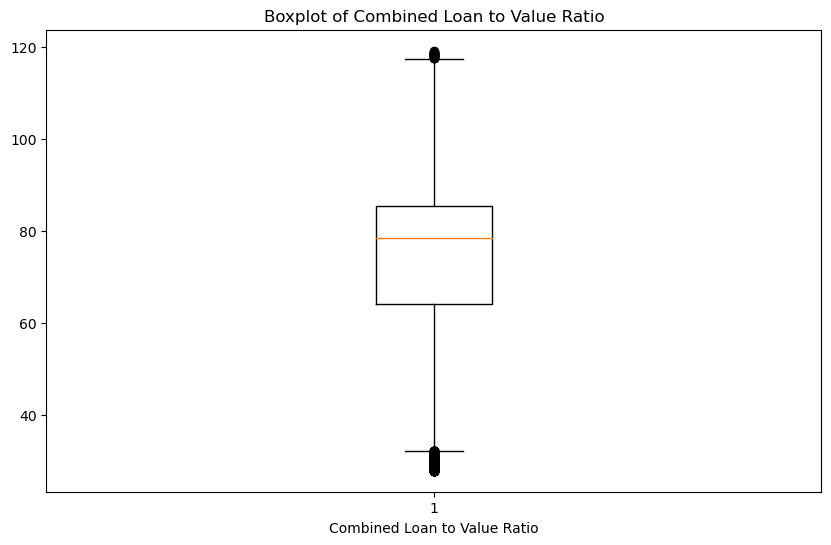

In [17]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['combined_loan_to_value_ratio'])
plt.title('Boxplot of Combined Loan to Value Ratio')
plt.xlabel('Combined Loan to Value Ratio')
plt.show()

In [18]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

80.000     9270
95.000     2479
75.000     1848
97.000     1805
90.000     1550
           ... 
99.578        1
104.355       1
83.732        1
54.520        1
31.240        1
Name: combined_loan_to_value_ratio, Length: 18817, dtype: int64


In [19]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'combined_loan_to_value_ratio'] = pd.to_numeric(df_no_outliers['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].max()
median_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 27.778
Maximum Interest Rate: 119.195
Median Interest Rate: 78.462


C:\Users\marku\AppData\Local\Temp\ipykernel_7460\3072740982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'combined_loan_to_value_ratio'] = pd.to_numeric(df_no_outliers['combined_loan_to_value_ratio'], errors='coerce')


# Make range categories

In [20]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

80.000     9270
95.000     2479
75.000     1848
97.000     1805
90.000     1550
           ... 
99.578        1
104.355       1
83.732        1
54.520        1
31.240        1
Name: combined_loan_to_value_ratio, Length: 18817, dtype: int64


In [21]:
# First, obtain a view of the DataFrame
view = df_no_outliers['combined_loan_to_value_ratio']

# Calculate the mode of the view
mode_value = view.mode().values[0]

# Use .loc to fill missing values in the original DataFrame
df_no_outliers.loc[df_no_outliers['combined_loan_to_value_ratio'].isnull(), 'combined_loan_to_value_ratio'] = mode_value


In [22]:
'''
Minimum combined_loan_to_value_ratio: 0.003
Maximum combined_loan_to_value_ratio: 98000.0
Median combined_loan_to_value_ratio: 75.758
'''

# Convert the 'combined_loan_to_value_ratio' column to numeric
new_df = df_no_outliers.copy()

# Define a function to categorize combined_loan_to_value_ratio into the desired ranges
def categorize_combined_loan_to_value_ratio(ratio):
    if ratio >= 0.0 and ratio <= 25.0:
        return '0.0-25.0'
    if ratio >= 25.0 and ratio <= 30.0:
        return '25.0-30.0'
    elif ratio > 30.0 and ratio <= 35.0:
        return '30.0-35.0'
    elif ratio > 35.0 and ratio <= 40.0:
        return '35.0-40.0'
    elif ratio > 40.0 and ratio <= 45.0:
        return '40.0-45.0'
    elif ratio > 45.0 and ratio <= 50.0:
        return '45.0-50.0'
    elif ratio > 50.0 and ratio <= 55.0:
        return '50.0-55.0'
    elif ratio > 55.0 and ratio <= 60.0:
        return '55.0-60.0'
    elif ratio > 60.0 and ratio <= 65.0:
        return '60.0-65.0'
    elif ratio > 65.0 and ratio <= 70.0:
        return '65.0-70.0'
    elif ratio > 70.0 and ratio <= 75.0:
        return '70.0-75.0'
    elif ratio > 75.0 and ratio <= 80.0:
        return '75.0-80.0'
    elif ratio > 80.0 and ratio <= 85.0:
        return '80.0-85.0'
    elif ratio > 85.0 and ratio <= 90.0:
        return '85.0-90.0'
    elif ratio > 90.0 and ratio <= 95.0:
        return '90.0-95.0'
    elif ratio > 95.0 and ratio <= 100.0:
        return '95.0-100.0'
    elif ratio > 100.0 and ratio <= 125.0:
        return '100.0-120.0'
    else:
        print(ratio)
        return 'Other'

# Apply the categorization function to 'combined_loan_to_value_ratio' column
new_df['combined_loan_to_value_ratio'] = new_df['combined_loan_to_value_ratio'].apply(categorize_combined_loan_to_value_ratio)

# Print the result
print(new_df['combined_loan_to_value_ratio'].value_counts())

75.0-80.0      14184
70.0-75.0       6119
95.0-100.0      5431
65.0-70.0       5071
90.0-95.0       4314
85.0-90.0       4063
55.0-60.0       3696
80.0-85.0       3206
60.0-65.0       3170
50.0-55.0       2438
45.0-50.0       2206
40.0-45.0       1547
35.0-40.0       1265
100.0-120.0     1122
30.0-35.0        971
25.0-30.0        377
Name: combined_loan_to_value_ratio, dtype: int64


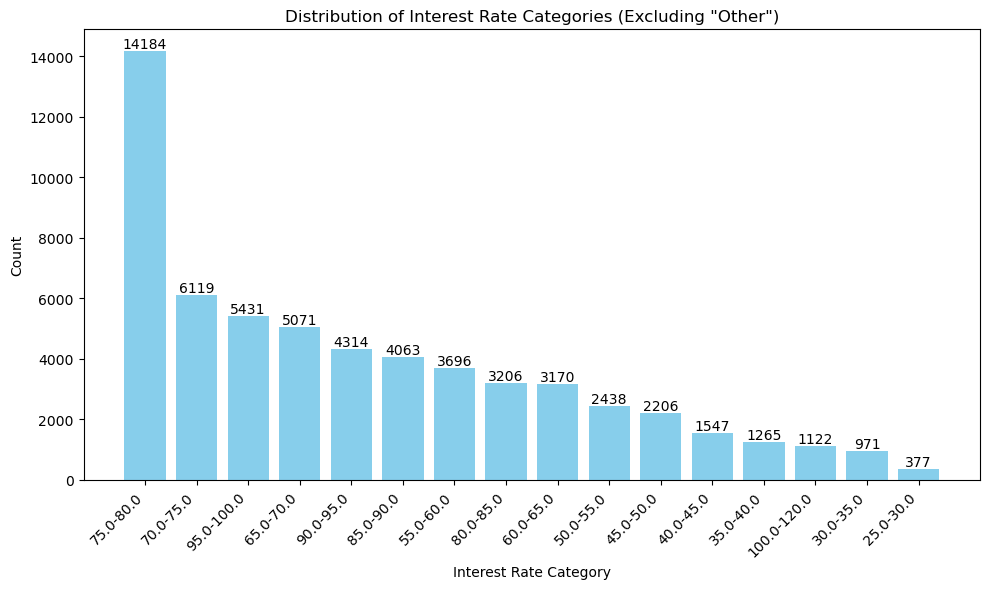

In [23]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['combined_loan_to_value_ratio'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['combined_loan_to_value_ratio'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [24]:
new_df.to_csv('6_combined_loan_to_value_ratio.csv', index=False)